<a href="https://colab.research.google.com/github/bonillahermes/Data_Science_Projects/blob/main/EDA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hermes Yate Bonilla
**Data Scientist**
---

**Contact:**
- **Email:** [bonillahermes@gmail.com](mailto:bonillahermes@gmail.com)
- **LinkedIn:** [linkedin.com/in/bonillahermes](https://www.linkedin.com/in/bonillahermes/)
- **GitHub:** [github.com/bonillahermes](https://github.com/bonillahermes)
- **Webpage:** [bonillahermes.com](https://bonillahermes.com/)
---

## Objetivos
1. Comprender la diferencia entre correlación y causalidad.
2. Visualizar la relación entre dos variables numericas.
3. Aplicar métodos para analizar correlaciones entre variables númericas.
4. Calcular la matriz de correlación y visualizarla.
4. Realizar una prueba de hipótesis usando el método de la correlación.


# Conceptos clave

- **Correlación**: Medida estadística que describe la extensión en la que dos variables cambian juntas.
- **Causalidad**: Relación entre dos eventos donde uno es el resultado del otro.
- **Variable de confusión**: Una variable que está correlacionada tanto con la variable dependiente como con la independiente y que puede causar una falsa correlación.
- **Métodos observacionales**: Estudios donde los investigadores observan y analizan sin intervenir o alterar las variables de estudio.

## Métodos para evaluar causalidad en estudios observacionales

1. **Controlar variables de confusión**: Usar técnicas estadísticas, como la regresión, para controlar otras variables que podrían estar afectando la relación.
2. **Estudios longitudinales**: Observar las variables de interés durante un largo período de tiempo para determinar la dirección de la relación.
3. **Diseños de estudio**: Usar diseños como estudios de caso-control o cohortes para inferir causalidad.

## Importar los paquetes necesarios

In [ ]:
!pip install heatmapz

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Sobre los datos: World Development Indicators (WDI)**

Los Indicadores de Desarrollo Mundial (WDI) son la principal colección de indicadores de desarrollo del Banco Mundial, compilados a partir de fuentes internacionales oficialmente reconocidas. Presenta los datos de desarrollo global más actuales y precisos disponibles e incluye estimaciones nacionales, regionales y globales.

La base de datos contempla algunos de los indicadores mencionados entre 2023 y 2023.

Diponible en: https://databank.worldbank.org/source/world-development-indicators/preview/on

In [ ]:
#Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/IC/WorldData_IC06.csv', delimiter=',')
df

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",CO2 emissions (metric tons per capita),"Fertility rate, total (births per woman)",GDP (current US$),High-technology exports (% of manufactured exports),"Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km),Urban population growth (annual %)
0,Afghanistan,AFG,2013,106.537,0.298088,5.696,2.056449e+10,NaN,4.822785,62.417,53.286340,48.359028,3.466788,31541209,652860.0,4.344553
1,Afghanistan,AFG,2014,101.454,0.283692,5.560,2.055058e+10,NaN,0.566945,62.545,56.263143,50.160542,3.657576,32716210,652860.0,4.531769
2,Afghanistan,AFG,2015,97.415,0.297972,5.405,1.999814e+10,NaN,2.447563,62.659,58.391096,51.750915,3.121341,33753499,652860.0,3.996008
3,Afghanistan,AFG,2016,94.018,0.268359,5.262,1.801955e+10,NaN,-2.197526,63.136,62.371096,53.104284,2.581549,34636207,652860.0,3.452643
4,Afghanistan,AFG,2017,90.342,0.281196,5.129,1.889635e+10,NaN,2.403656,63.016,67.136415,54.648541,2.866492,35643418,652860.0,3.781557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Zimbabwe,ZWE,2018,98.507,0.735435,3.659,3.415607e+10,2.063693,200.769578,61.414,85.761588,38.909614,2.020537,15052184,390760.0,1.933653
2156,Zimbabwe,ZWE,2019,97.354,0.663338,3.599,2.183223e+10,4.949714,225.394648,61.292,85.940989,39.691374,1.989253,15354608,390760.0,1.992351
2157,Zimbabwe,ZWE,2020,96.180,0.530484,3.545,2.150970e+10,2.383868,604.945864,61.124,84.186274,40.505793,2.031112,15669666,390760.0,2.130421
2158,Zimbabwe,ZWE,2021,94.312,NaN,3.491,2.837124e+10,NaN,113.294981,59.253,89.146019,NaN,2.045715,15993524,NaN,2.234724


**Country Name:** Nombre del país.

**Country Code:** Código del país.

**Year:** Año.

**Adolescent fertility rate** (births per 1,000 women ages 15-19): Tasa de fertilidad adolescente (nacimientos por 1,000 mujeres de 15 a 19 años).

**CO2 emissions** (metric tons per capita): Emisiones de CO2 (toneladas métricas por persona).

**Fertility rate, total** (births per woman): Tasa de fertilidad total (nacimientos por mujer).

**GDP** (current US$): PIB (dólares corrientes).

**High-technology exports** (% of manufactured exports): Exportaciones de alta tecnología (% de exportaciones manufacturadas).

**Inflation, GDP deflator** (annual %): Inflación, deflactor del PIB (anual %).

**Life expectancy at birth**, total (years): Esperanza de vida al nacer, total (años).

**Mobile cellular subscriptions** (per 100 people): Suscripciones a telefonía móvil celular (por cada 100 personas).

**Population density** (people per sq. km of land area): Densidad de población (personas por km² de área terrestre).

**Population growth**(annual %): Crecimiento de la población (anual %).

**Population, total:** Población total.

**Surface area** (sq. km): Superficie (km²).

**Urban population growth (annual %)**: Crecimiento de la población urbana (anual %).

In [ ]:
# Tamaño del dataframe
df.shape

(2160, 16)

In [ ]:
#Tipo de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country Name                                                   2160 non-null   object 
 1   Country Code                                                   2160 non-null   object 
 2   Year                                                           2160 non-null   int64  
 3   Adolescent fertility rate (births per 1,000 women ages 15-19)  1944 non-null   float64
 4   CO2 emissions (metric tons per capita)                         1528 non-null   float64
 5   Fertility rate, total (births per woman)                       1883 non-null   float64
 6   GDP (current US$)                                              2059 non-null   float64
 7   High-technology exports (% of manufactured exports)         

In [ ]:
# Filtrar el dataframe para un año en particular
df_2019 = df[df['Year'] == 2019] # para filtrar varios años df_filtrada = df[df['Year'].isin([2010, 2012, 2014])] o df_filtrada = df[df['Year'] <= 2019]
df_2019

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",CO2 emissions (metric tons per capita),"Fertility rate, total (births per woman)",GDP (current US$),High-technology exports (% of manufactured exports),"Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km),Urban population growth (annual %)
6,Afghanistan,AFG,2019,86.803,0.297564,4.870,1.890450e+10,NaN,6.521480,63.565000,59.783879,57.908252,2.908529,37769499,652860.0,3.919287
16,Albania,ALB,2019,15.013,1.749462,1.414,1.540183e+10,0.128427,1.257025,79.282000,91.516429,104.167555,-0.426007,2854191,28750.0,1.071414
26,Algeria,DZA,2019,12.303,3.994402,2.988,1.717600e+11,NaN,-0.472182,76.474000,106.369609,17.930316,1.839445,42705368,2381741.0,2.607530
36,American Samoa,ASM,2019,30.650,NaN,NaN,6.470000e+08,NaN,1.748289,NaN,NaN,236.605000,-2.304139,47321,200.0,-2.310690
46,Andorra,AND,2019,5.985,6.287204,NaN,3.155149e+09,NaN,1.374754,NaN,115.150047,162.431915,1.757491,76343,470.0,1.669358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,Vietnam,VNM,2019,34.703,3.567848,1.948,3.343650e+11,40.433396,2.423208,74.093000,142.237500,305.577072,0.904491,95776716,331310.0,2.859150
2126,Virgin Islands (U.S.),VIR,2019,31.850,NaN,2.050,4.117000e+09,NaN,2.134873,79.668293,79.344613,304.768571,-0.310760,106669,350.0,-0.194483
2136,"Yemen, Rep.",YEM,2019,57.830,0.354864,3.963,NaN,NaN,NaN,65.092000,48.303006,59.750916,2.426208,31546691,527970.0,4.133613
2146,Zambia,ZMB,2019,122.836,0.414336,4.451,2.330867e+10,2.303531,7.633470,62.793000,93.689663,24.725214,3.007618,18380477,752610.0,4.265728


# Sobre las **variables de confusión**

Una variable de confusión es una variable que puede causar o incidir en el resultado de interés, es una variable externa que distorsiona la relación entre otras dos variables en un estudio. Si no se tiene en cuenta una variable de confusión, puede dar lugar a una falsa asociación entre las variables estudiadas.

Por ejemplo, en un estudio que busca determinar la relación entre el ejercicio físico y la pérdida de peso. Si no se controla la dieta (la cantidad y calidad de los alimentos consumidos), que es una variable de confusión potencial, la relación entre el ejercicio y la pérdida de peso podría ser distorsionada, ya que la dieta también afecta la pérdida de peso.

**¿Cómo identificar una variable de confusión?**

**Conocimiento del tema:** La experiencia y el conocimiento en el área de estudio son esenciales para identificar posibles variables de confusión. Es crucial entender la literatura existente y los factores ya identificados que podrían afectar la relación.

**Diagramas de causalidad:** se utilizan diagramas de causalidad (como los diagramas de DAG) para visualizar las relaciones entre variables y ayudar a identificar variables de confusión.

**Análisis estadístico:** Al incluir potenciales variables de confusión en un modelo estadístico (como una regresión), si el coeficiente de la variable de interés cambia significativamente, es una señal de que la variable adicional puede ser una confusora.

**Experimentos controlados:** Si es posible, diseñar un experimento donde se controlen las variables de confusión potenciales. Si la relación entre las variables de interés persiste incluso después de controlar otras variables, es menos probable que esas variables controladas sean confusoras.

# Ejemplos de posibles **variables de confusión**

# Relación entre "Esperanza de vida" y "PIB (dólares corrientes)":

Variable de confusión: "Acceso a atención médica". Un país con mayor PIB podría tener mejor infraestructura y acceso a atención médica, lo que podría aumentar la esperanza de vida, independientemente del nivel absoluto de PIB.

# Relación entre "Emisiones de CO2" y "Crecimiento de la población urbana":

Variable de confusión: "Industrialización". Un aumento en la industrialización podría llevar a mayores emisiones de CO2 y, al mismo tiempo, atraer a más personas a las áreas urbanas debido a las oportunidades de empleo.

# Relación entre "Tasa de fertilidad adolescente" y "PIB (dólares corrientes)":

Variable de confusión: "Educación". Países con mayor PIB podrían tener sistemas educativos más fuertes y programas de educación sexual, lo que podría influir en la tasa de fertilidad adolescente.


# **Correlación entre variables**

**Descripción**: Determina si hay una correlación entre "Emisiones de CO2" y "Crecimiento de la población urbana". Recuerda que una correlación cercana a 1 indica una relación positiva fuerte, una correlación cercana a -1 indica una relación negativa fuerte, y una correlación cercana a 0 indica que no hay una relación lineal fuerte entre las variables.

In [ ]:
# Correlación entre "CO2 emissions (metric tons per capita)" y "Urban population growth (annual %)"
correlation_co2_urban_growth = df['CO2 emissions (metric tons per capita)'].corr(df['Urban population growth (annual %)'])
correlation_co2_urban_growth

-0.20278408801121559

La correlación entre "Emisiones de CO2" y "Crecimiento de la población urbana" es aproximadamente −0.20. Esto indica una relación negativa débil entre las dos variables. Es decir, a medida que una variable aumenta, la otra tiende a disminuir, pero la relación no es fuerte.

# **GRÁFICOS DE DISPERSIÓN: Explorar las relaciones entre dos variables por medio de los gráficos de dispersión**

Los diagramas de dispersión permiten hacer un análisis bivariado para entender las relaciones entre algunas de las variables.

In [ ]:
# Gráfico de dispersión usando Plotly
fig = px.scatter(df_2019,
                 x='Adolescent fertility rate (births per 1,000 women ages 15-19)',
                 y='Urban population growth (annual %)',
                 hover_data=['Urban population growth (annual %)', 'Country Name'])

fig.show()

Ahora dibujamos el gráfico de dispersión para todos los años.

In [ ]:
fig1 = px.scatter(df,
                 x='Adolescent fertility rate (births per 1,000 women ages 15-19)',
                 y='Urban population growth (annual %)',
                 color='Country Name',
                 hover_data=['Urban population growth (annual %)', 'Country Name', 'Year'])

fig1.show()

In [ ]:
# Guarda el gráfico como un archivo HTML
fig1.write_html("scatter_tasa.html")

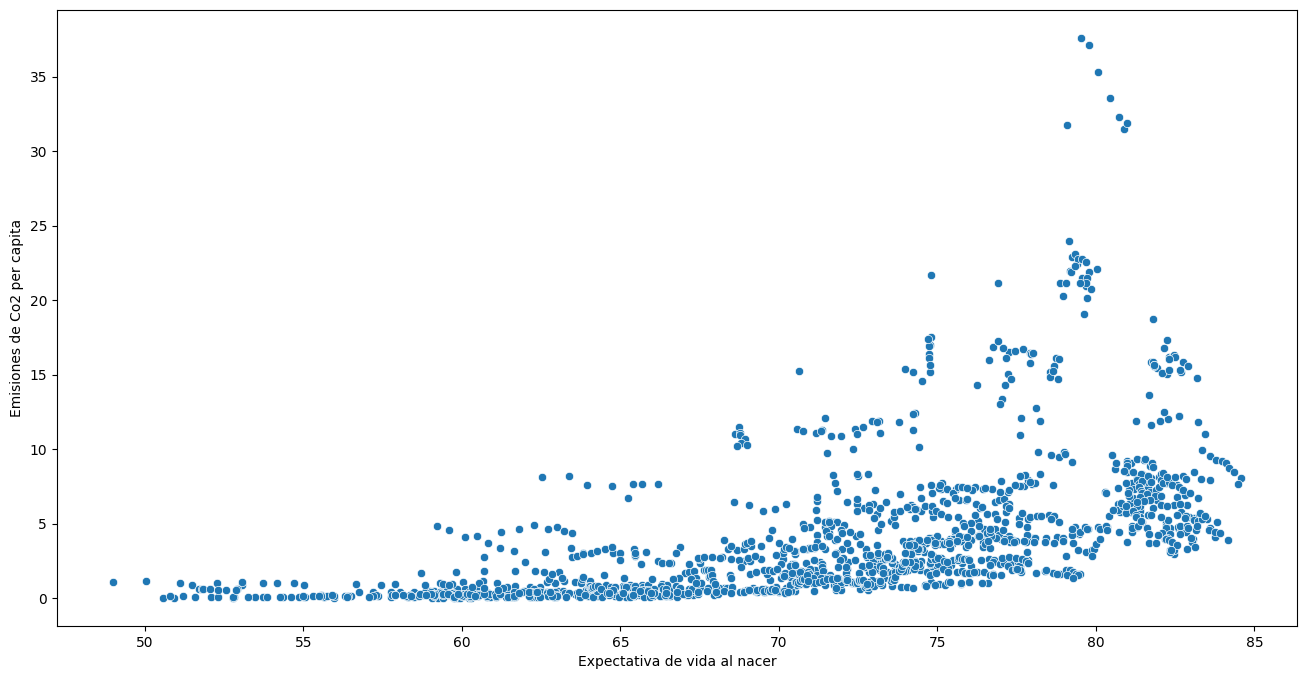

In [ ]:
plt.figure(figsize = (16, 8)) #cambiar tamaño de la imagen
sns.scatterplot(data=df, x="Life expectancy at birth, total (years)", y="CO2 emissions (metric tons per capita)")
plt.ylabel('Emisiones de Co2 per capita') #cambiar nombre eje Y
plt.xlabel('Expectativa de vida al nacer') #cambiar nombre eje X
plt.show()

# **Análisis de Correlación** entre las diferentes variables

En un análisis de correlación, el primer paso es calcular la matriz de correlación entre las diferentes variables númericas. Después se dibuja esta matriz usando un mapa de calor, también conocido como correlogram.

# **Matriz de correlación**

In [ ]:
# Calcular la matriz de correlación
corr = df.corr()
corr

<ipython-input-30-f5afa8a54351>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",CO2 emissions (metric tons per capita),"Fertility rate, total (births per woman)",GDP (current US$),High-technology exports (% of manufactured exports),"Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km),Urban population growth (annual %)
Year,1.000000,-0.074437,-0.025248,-0.075223,0.024955,-0.037186,0.127983,0.025231,0.042139,0.003629,-0.117361,0.007866,0.000013,-0.086040
"Adolescent fertility rate (births per 1,000 women ages 15-19)",-0.074437,1.000000,-0.529801,0.826655,-0.153559,-0.025863,0.085928,-0.813921,-0.484400,-0.165376,0.470439,-0.045189,-0.027596,0.556364
CO2 emissions (metric tons per capita),-0.025248,-0.529801,1.000000,-0.467539,0.234802,0.021726,-0.111153,0.550325,0.502326,0.105814,-0.067690,0.015418,0.225951,-0.202784
"Fertility rate, total (births per woman)",-0.075223,0.826655,-0.467539,1.000000,-0.153024,-0.052211,0.060858,-0.832537,-0.551219,-0.156567,0.589572,-0.041451,-0.034631,0.663580
GDP (current US$),0.024955,-0.153559,0.234802,-0.153024,1.000000,0.037277,-0.025581,0.177049,0.041980,-0.023509,-0.089887,0.564665,0.552980,-0.074904
High-technology exports (% of manufactured exports),-0.037186,-0.025863,0.021726,-0.052211,0.037277,1.000000,-0.013873,0.090616,0.088360,0.050061,-0.021899,0.017876,0.013205,-0.033123
"Inflation, GDP deflator (annual %)",0.127983,0.085928,-0.111153,0.060858,-0.025581,-0.013873,1.000000,-0.103412,-0.080344,-0.020900,0.005500,0.003098,0.024488,0.004560
"Life expectancy at birth, total (years)",0.025231,-0.813921,0.550325,-0.832537,0.177049,0.090616,-0.103412,1.000000,0.544070,0.207578,-0.399497,-0.000720,0.030797,-0.518242
Mobile cellular subscriptions (per 100 people),0.042139,-0.484400,0.502326,-0.551219,0.041980,0.088360,-0.080344,0.544070,1.000000,0.356515,-0.173186,-0.037293,0.014369,-0.251902
Population density (people per sq. km of land area),0.003629,-0.165376,0.105814,-0.156567,-0.023509,0.050061,-0.020900,0.207578,0.356515,1.000000,-0.011132,-0.026508,-0.064820,-0.057600


## **Dibujar la Matriz de correlación - Correlogram - Heatmap de Correlaciones**

Exploración de diferentes métodos para dibujar la matriz de correlación.

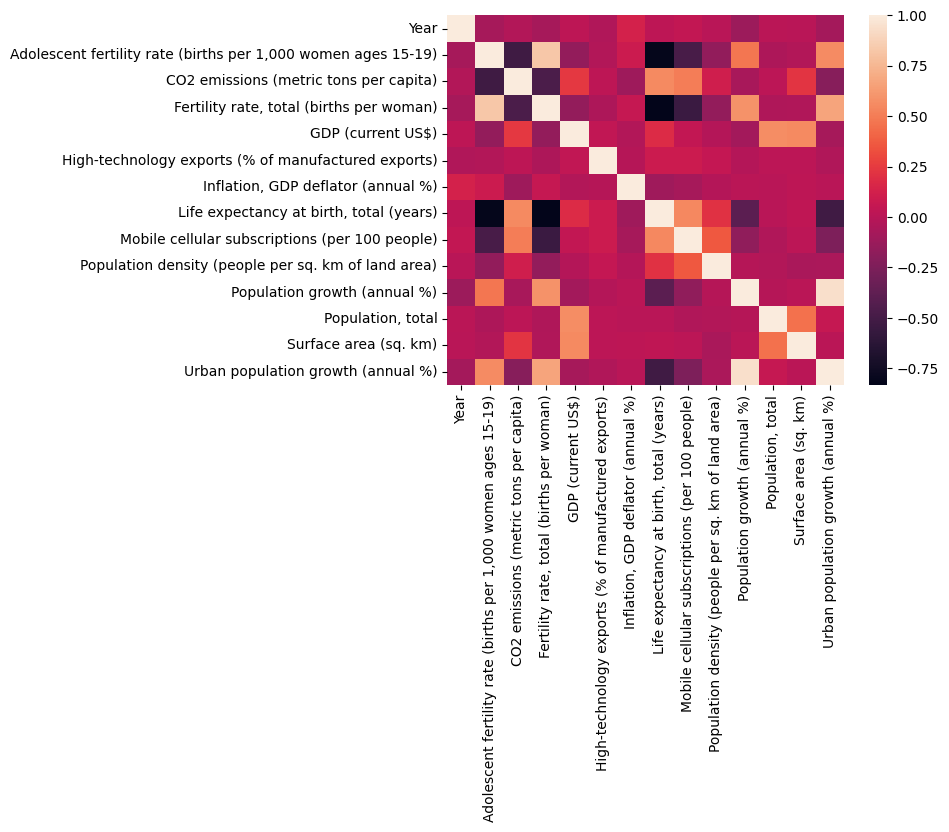

In [ ]:
# Heatmap básico
sns.heatmap(corr)
plt.show()

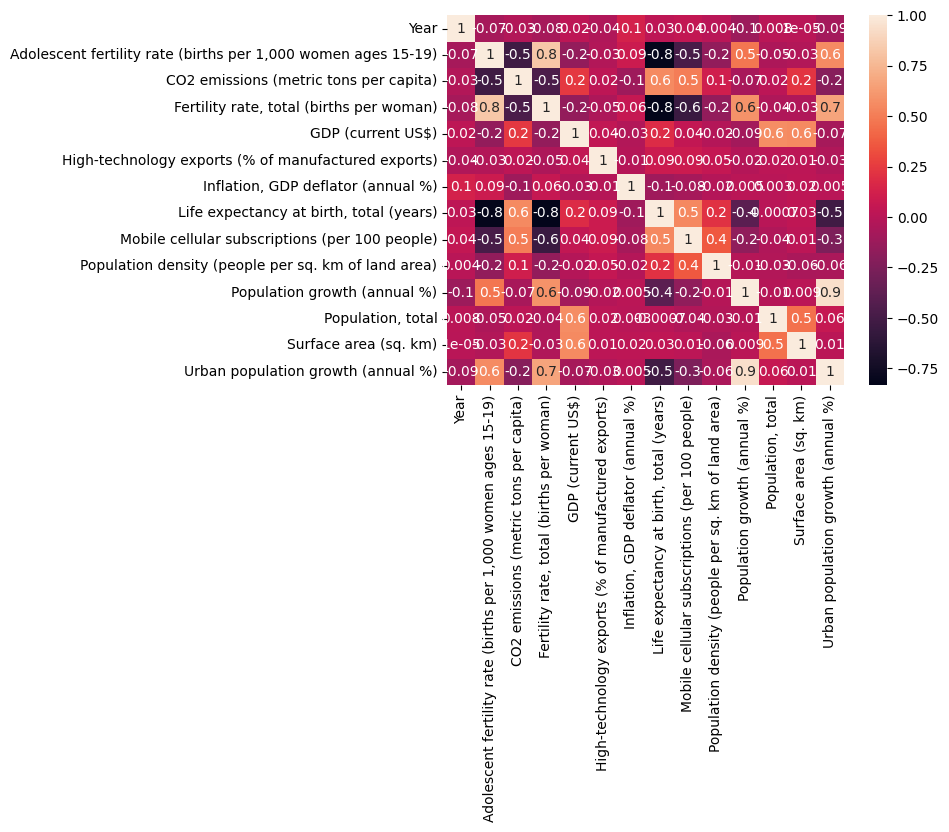

In [ ]:
sns.heatmap(corr, annot = True, fmt='.1g')
plt.show()

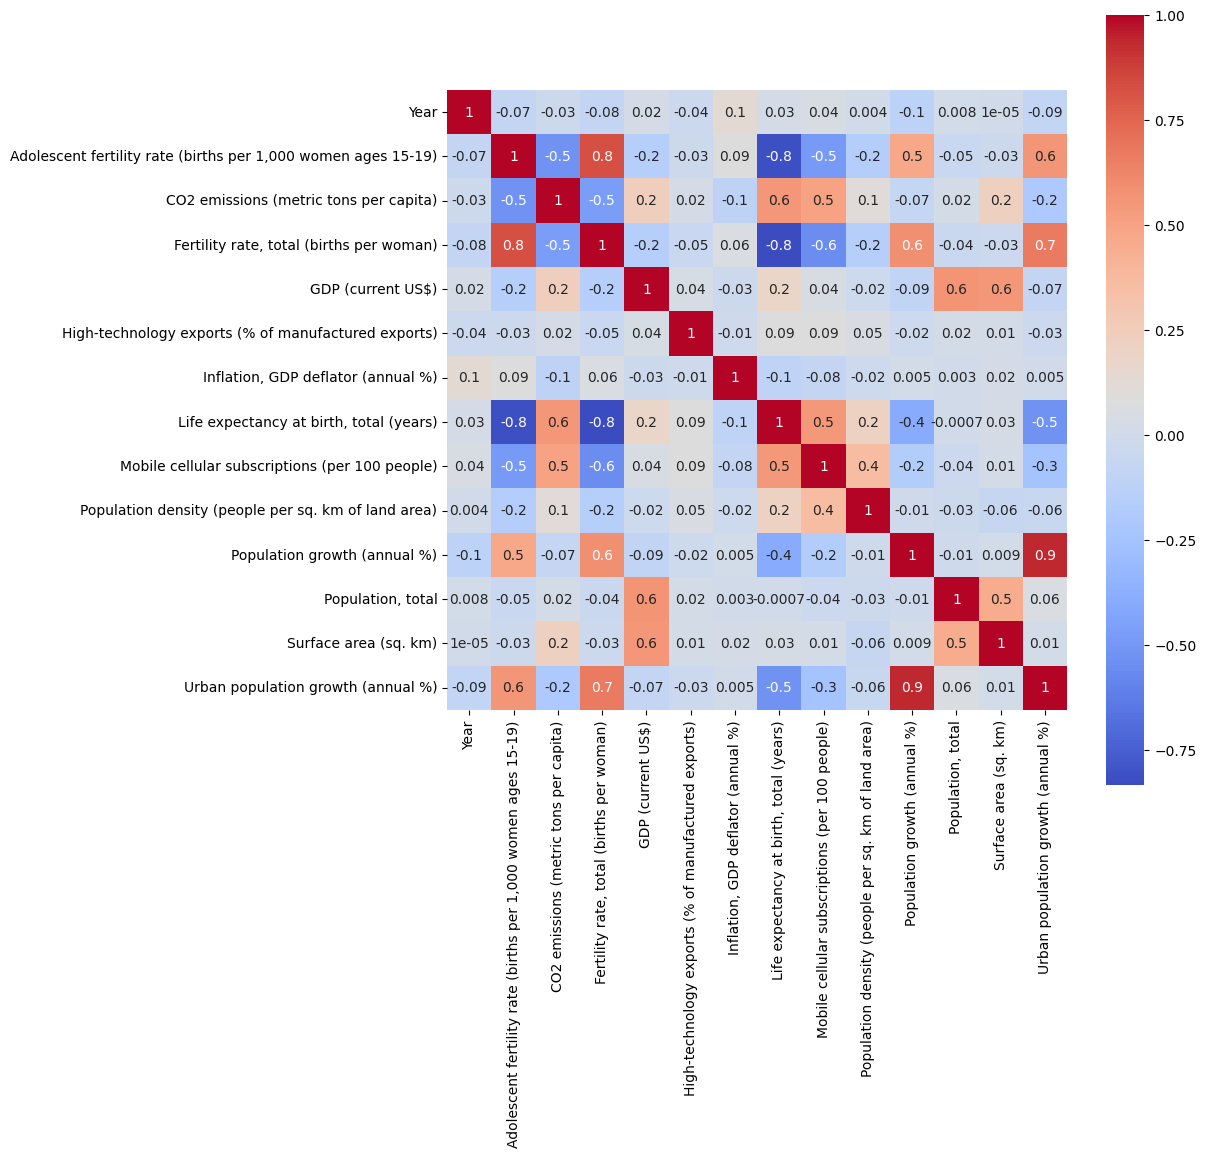

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot = True, fmt='.1g', cmap= 'coolwarm', square=True)
plt.show()

# **Cambiar el estilo de los gráficos.**

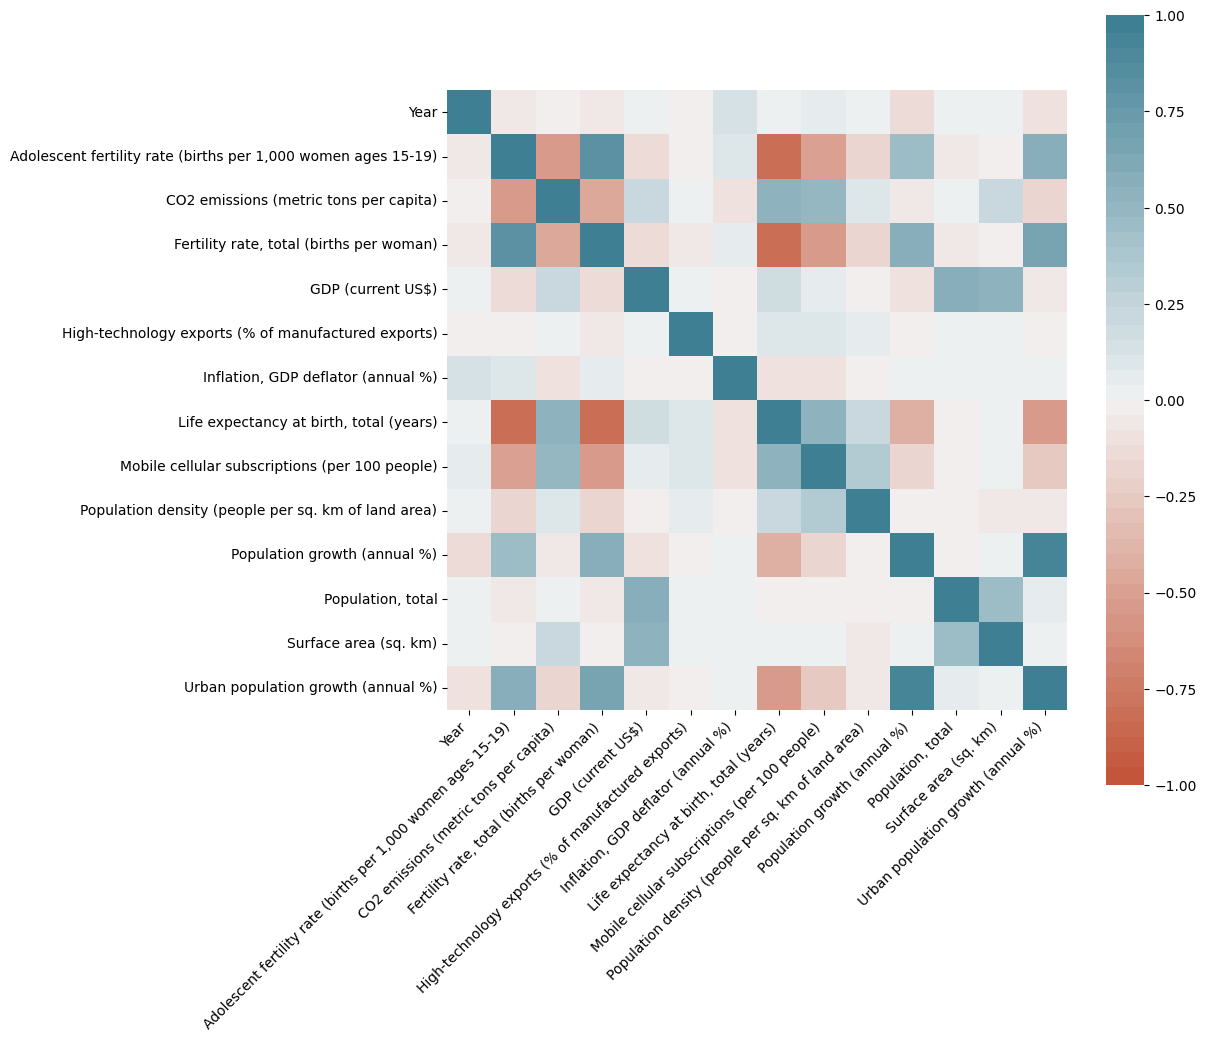

In [ ]:
# Matriz de correlación empleando el heatmap de seaborn
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=50), square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [ ]:
from heatmap import heatmap, corrplot

<ipython-input-36-92d9707f0011>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



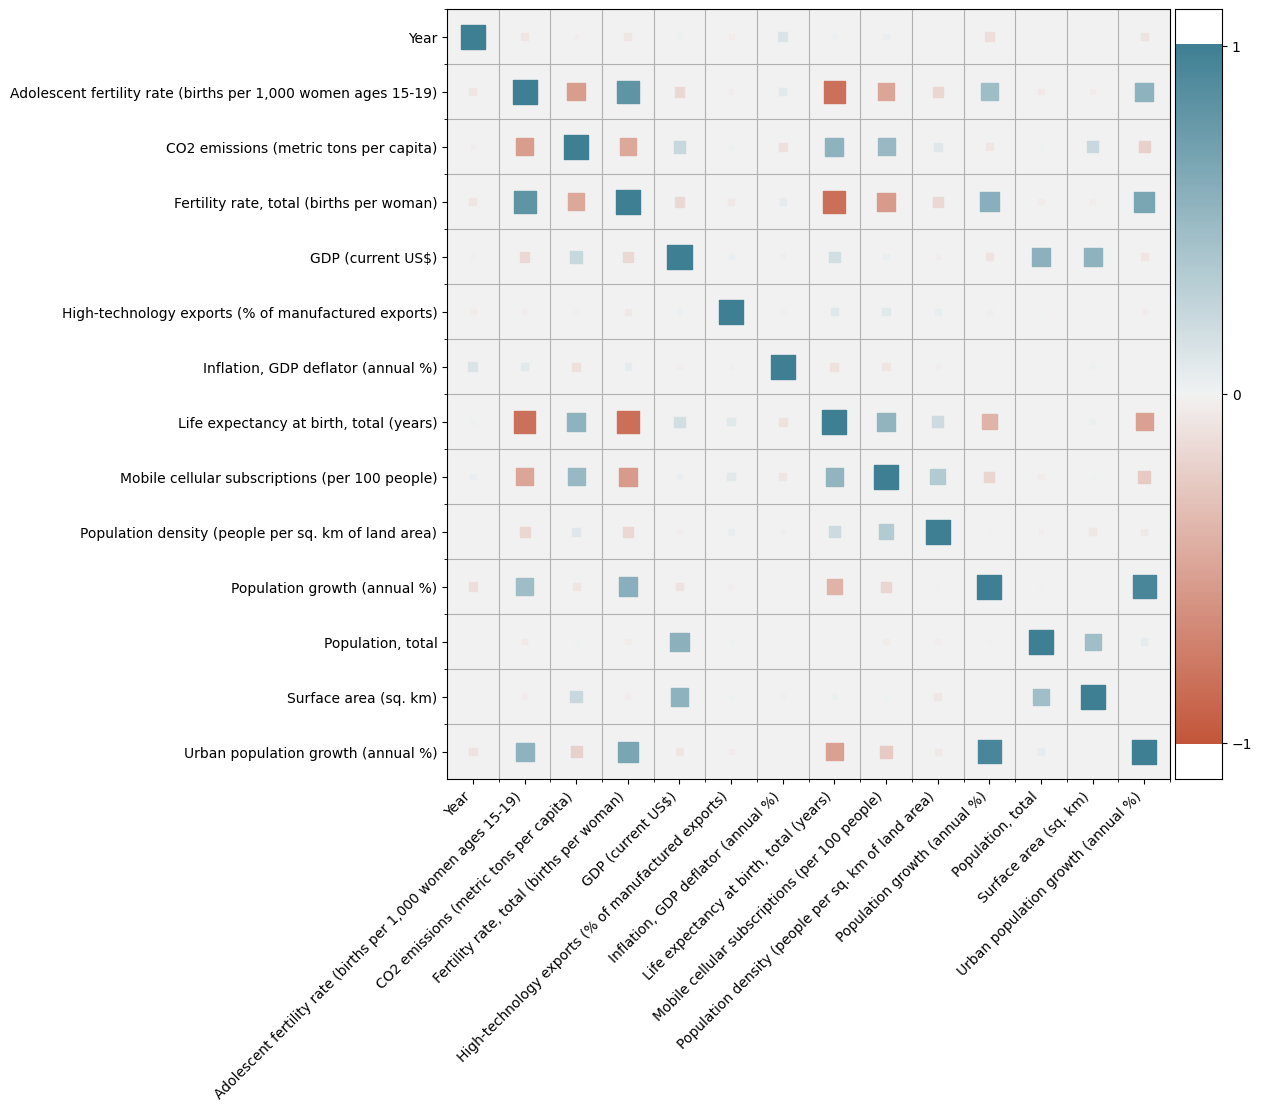

In [ ]:
# Matriz de correlación empleando la función corrplot de heatmap
plt.figure(figsize=(10, 10))
corrplot(df.corr(), size_scale=300);

# **Prueba de Hipótesis**

# **Objetivo:**

Evaluar si existe una relación lineal significativa entre la "Esperanza de vida al nacer" y el "PIB (dólares corrientes)" de los países.**

Hipótesis:

H0​: No hay correlación entre la "Esperanza de vida al nacer" y el "PIB (dólares corrientes)". La correlación poblacional (ρ) es 0.

Ha​: Existe una correlación significativa entre la "Esperanza de vida al nacer" y el "PIB (dólares corrientes)".

Pasos:

1. Limpieza de datos: Asegúrate de que ambos conjuntos de datos (Esperanza de vida y PIB) estén completos y que no haya valores faltantes.
2. Análisis descriptivo: Realiza un análisis descriptivo y visual (por ejemplo, un gráfico de dispersión) para tener una primera impresión de la relación entre las variables.
3. Calcular la correlación de Pearson: Utiliza la correlación de Pearson para cuantificar la relación lineal entre las dos variables.
4. Realizar la prueba de hipótesis: Basándose en el valor p de la correlación de Pearson, decide si rechazar o no la hipótesis nula. Un valor p pequeño (por lo general p menor a 0.05) indica que puedes rechazar la hipótesis nula.
5. Interpretación: Si rechazas la hipótesis nula, concluye que existe una correlación significativa entre la "Esperanza de vida al nacer" y el "PIB (dólares corrientes)". Si no rechazas la hipótesis nula, concluye que no hay evidencia suficiente para afirmar que hay una correlación.


In [ ]:
import scipy.stats as stats

In [ ]:
# Paso 1: Limpieza de Datos
# Eliminar las filas con valores faltantes en las columnas de interés
datos_limpios =df.dropna(subset=["Life expectancy at birth, total (years)", "GDP (current US$)"])

# Paso 2: Análisis Descriptivo
# Ya hemos visualizado esta relación en los gráficos de dispersión anteriores, así que pasamos al siguiente paso.

# Paso 3: Calcular la correlación de Pearson
coeficiente_correlacion, valor_p = stats.pearsonr(datos_limpios["Life expectancy at birth, total (years)"], datos_limpios["GDP (current US$)"])

coeficiente_correlacion, valor_p


(0.17704883868747381, 3.322482308655644e-14)

Resultados:

    Coeficiente de correlación de Pearson: r ≈ 0.177
    Valor p: p ≈ 3.32×10−14 = 0.0000000033

Interpretación:

El coeficiente de correlación es positivo, lo que indica una relación lineal positiva débil entre la "Esperanza de vida al nacer" y el "PIB (dólares corrientes)". Es decir, a medida que el PIB de un país aumenta, su esperanza de vida también tiende a hacerlo, aunque la relación no es fuerte.

El valor p es extremadamente pequeño, mucho menor que 0.05, lo que nos permite rechazar la hipótesis nula (H0​). Así, podemos concluir que hay una correlación significativa entre la "Esperanza de vida al nacer" y el "PIB (dólares corrientes)" en nuestro conjunto de datos.